In [4]:

import networkx as nx
from tools import *
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import glob
from tqdm import tqdm
from skimage.filters import sato
plt.style.use('JHStyleBold.mplstyle')

In [4]:
path_img_folder = ["./Dados_image/FIBRO CITO T0 COL/","./Dados_image/FIBRO CITO T10 COL/","./Dados_image/FIBRO CITO T20 COL/","./Dados_image/FIBRO CITO T30 COL/"]
count_folder = 0

# Inicialize listas para armazenar matrizes
all_count_nodes_imgs = []
all_average_degree = []
all_global_average_clustering = []
all_eccentricity = []

for folder_path in path_img_folder:
    # Configurações de diretórios
    folder_original = glob.glob(path_img_folder[count_folder] + "*")
    count = 0

    count_nodes_imgs = np.zeros(len(folder_original))
    average_degree = np.zeros(len(folder_original))
    global_average_clustering = np.zeros(len(folder_original))
    eccentricity = np.zeros(len(folder_original))

    for img_path  in tqdm(folder_original):
        img = gray(cv2.imread(img_path ))
        img_sato = sato(img, sigmas = [2])
        img_th = th_otsu(img_sato)
        sk = skeletonize(img_th,  method= 'zhang').astype(int)*255

        dic,edges,nodes=nodEdg(sk)

        G=nx.from_pandas_edgelist(edges)
        #fig, ax = plt.subplots(figsize = (40, 30))
        pos = dic  # position layout

        #metricas
        count_nodes_imgs[count] = len(nodes)
        average_degree[count] = len(edges)/len(nodes)
        global_average_clustering[count] = nx.average_clustering(G)

        # Obtendo o maior subgrafo conectado
        largest_cc = max(nx.connected_components(G), key=len)
        largest_subgraph = G.subgraph(largest_cc)
        
        eccentricity[count] = max(dict(nx.eccentricity(largest_subgraph)).values())

        #count faz percorrer por cada imgem
        count+=1
    
        # Adicione matrizes às listas após calcular todas as métricas para uma pasta
    all_count_nodes_imgs.append(count_nodes_imgs)
    all_average_degree.append(average_degree)
    all_global_average_clustering.append(global_average_clustering)
    all_eccentricity.append(eccentricity)
    count_folder +=1


100%|██████████| 24/24 [02:46<00:00,  6.96s/it]


In [5]:
import pickle
# Agrupe todos os dados em um único dicionário para facilidade
data_to_save = {
    'all_count_nodes_imgs': all_count_nodes_imgs,
    'all_average_degree': all_average_degree,
    'all_global_average_clustering': all_global_average_clustering,
    'all_eccentricity': all_eccentricity
}
# Salve o dicionário em um arquivo usando pickle
with open('dados.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)



In [5]:
import pickle

with open('dados_sem_tubeness.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Agora, você pode acessar suas listas assim:
all_count_nodes_imgs = loaded_data['all_count_nodes_imgs']
all_average_degree = loaded_data['all_average_degree']
all_global_average_clustering = loaded_data['all_global_average_clustering']
all_eccentricity = loaded_data['all_eccentricity']
# E assim por diante para as outras variáveis


Quero calcular a quantidade de nodes da rede. Existe uma dispersão grande ? faz sentido procurar a dispersão ? no site tem outras metricas estatisticas q pode ajudar, ou nao

https://docs.python.org/pt-br/3/library/statistics.html#statistics.pstdev

Text(0.5, 0, 'Image')

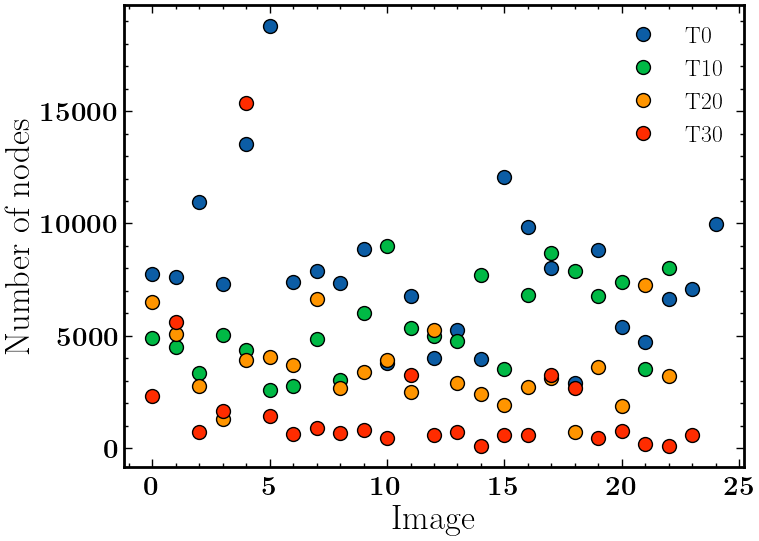

In [8]:
from statistics import stdev
def graphic_nodes(x, label):
   
    plt.plot(np.arange(len(x)), x, 'o', label = label)
    plt.legend()
    

graphic_nodes(all_count_nodes_imgs[0],label='T0')
graphic_nodes(all_count_nodes_imgs[1],label='T10')
graphic_nodes(all_count_nodes_imgs[2],label='T20')
graphic_nodes(all_count_nodes_imgs[3],label='T30')
plt.ylabel('Number of nodes')
plt.xlabel('Image')



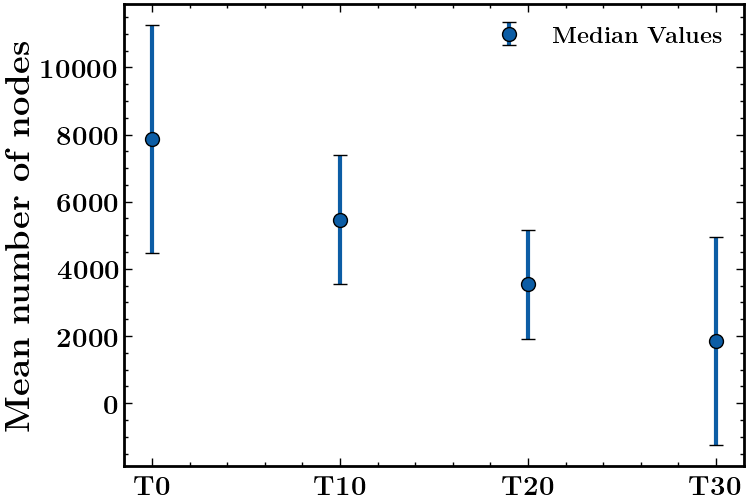

In [9]:
T0_median = np.mean(all_count_nodes_imgs[0])
T10_median = np.mean(all_count_nodes_imgs[1])
T20_median = np.mean(all_count_nodes_imgs[2])
T30_median = np.mean(all_count_nodes_imgs[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_count_nodes_imgs[0])
T10_std = np.std(all_count_nodes_imgs[1])
T20_std = np.std(all_count_nodes_imgs[2])
T30_std = np.std(all_count_nodes_imgs[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)
plt.xticks(np.arange(len(T_median)), [r'\bf{T0}', r'\bf{T10}', r'\bf{T20}', r'\bf{T30}'])
plt.ylabel(r'\bf{Mean number of nodes}')


# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend([r'\bf{Median Values}'])




Text(0, 0.5, '\\bf{Mean number of nodes}')

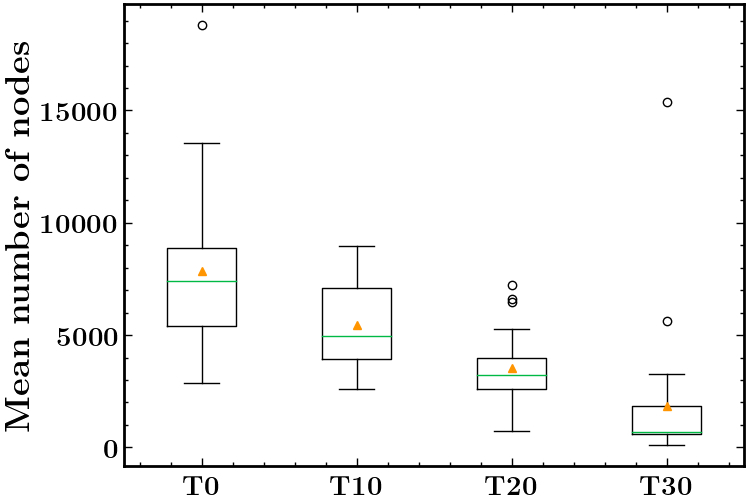

In [19]:
T0_median = np.mean(all_count_nodes_imgs[0])
T10_median = np.mean(all_count_nodes_imgs[1])
T20_median = np.mean(all_count_nodes_imgs[2])
T30_median = np.mean(all_count_nodes_imgs[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])




# Plotting with error bars
labels = [r'\bf{T0}', r'\bf{T10}', r'\bf{T20}', r'\bf{T30}']
plt.boxplot(all_count_nodes_imgs, labels=labels ,showmeans= True)

plt.ylabel(r'\bf{Mean number of nodes}')

aqui estou calculando average degree of a node usando o link. Nesse caso para cada imagem de celula temos um ponto no grafico.

https://bookdown.org/omarlizardo/_main/2-7-average-degree.html



Text(0.5, 0, 'Image')

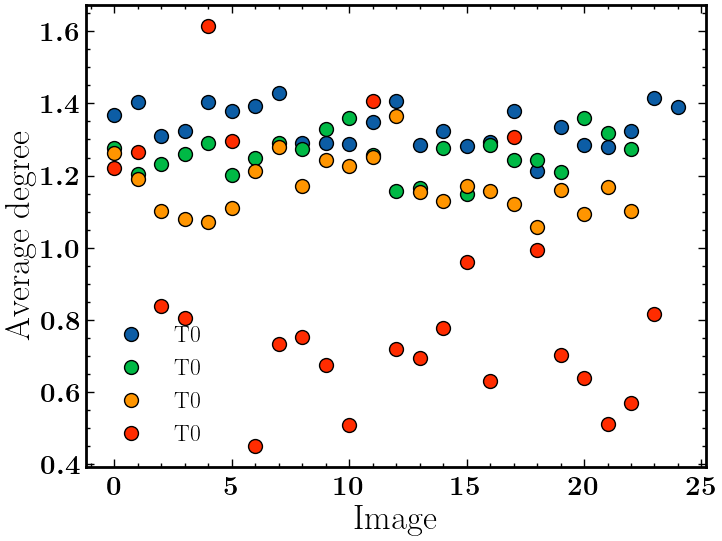

In [22]:
graphic_nodes(all_average_degree[0],label='T0')
graphic_nodes(all_average_degree[1],label='T0')
graphic_nodes(all_average_degree[2],label='T0')
graphic_nodes(all_average_degree[3],label='T0')
plt.ylabel('Average degree')
plt.xlabel('Image')


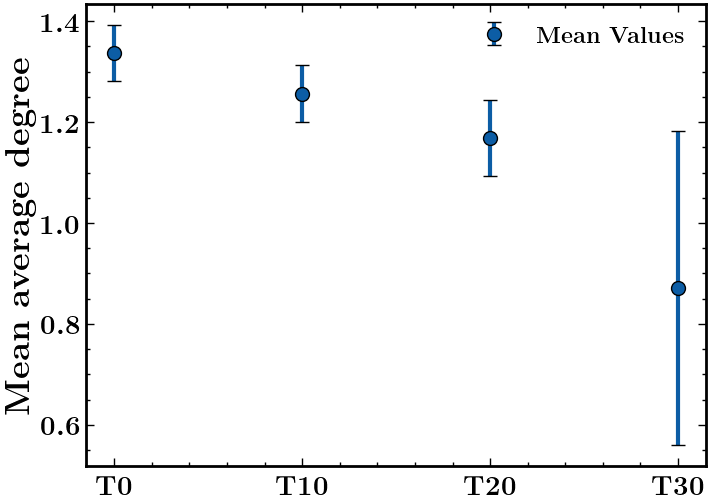

In [23]:
T0_median = np.mean(all_average_degree[0])
T10_median = np.mean(all_average_degree[1])
T20_median = np.mean(all_average_degree[2])
T30_median = np.mean(all_average_degree[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_average_degree[0])
T10_std = np.std(all_average_degree[1])
T20_std = np.std(all_average_degree[2])
T30_std = np.std(all_average_degree[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)
plt.xticks(np.arange(len(T_median)), )
plt.ylabel(r'\bf{Mean average degree}')


# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend([r'\bf{Mean Values}'])


Text(0, 0.5, '\\bf{Mean average degree}')

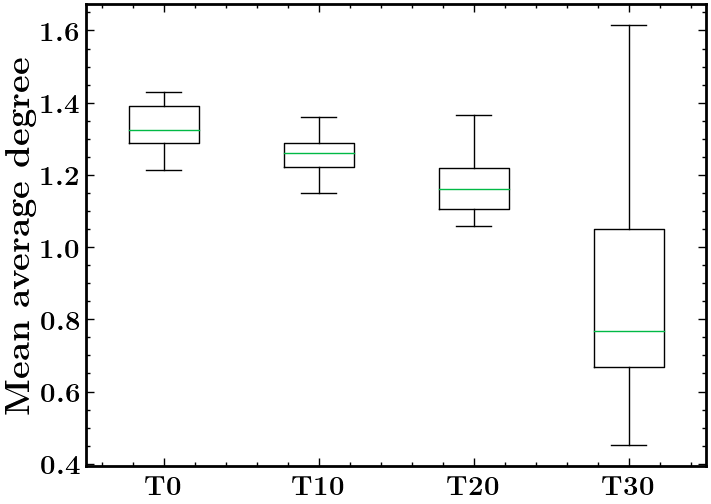

In [26]:
T0_median = np.mean(all_average_degree[0])
T10_median = np.mean(all_average_degree[1])
T20_median = np.mean(all_average_degree[2])
T30_median = np.mean(all_average_degree[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])

plt.boxplot(all_average_degree, labels = labels)
plt.ylabel(r'\bf{Mean average degree}')



clustering coefficient of a node Ci is defined as $Ci = \frac{(2Ei)}{(k(k + 1))}$, where k is the number of neighbors of the node i and Ei is the number of existing links between its neighbors.

Obs: It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. (so achei legal!)

No wiki tem dois casos: local e global. Calculei o global pq acho q faz mais sentido para comparar os valores.

https://en.wikipedia.org/wiki/Clustering_coefficient

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering

Text(0.5, 0, 'Image')

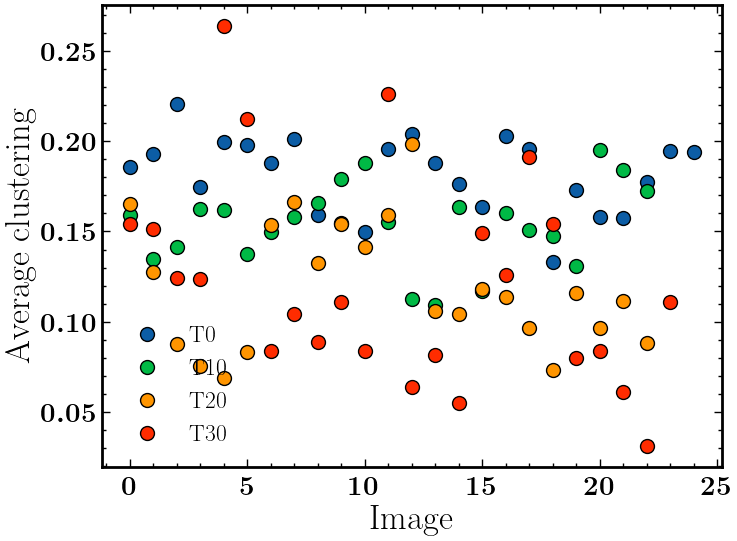

In [28]:
graphic_nodes(all_global_average_clustering[0],label='T0')
graphic_nodes(all_global_average_clustering[1],label='T10')
graphic_nodes(all_global_average_clustering[2],label='T20')
graphic_nodes(all_global_average_clustering[3],label='T30')

plt.ylabel('Average clustering')
plt.xlabel('Image')


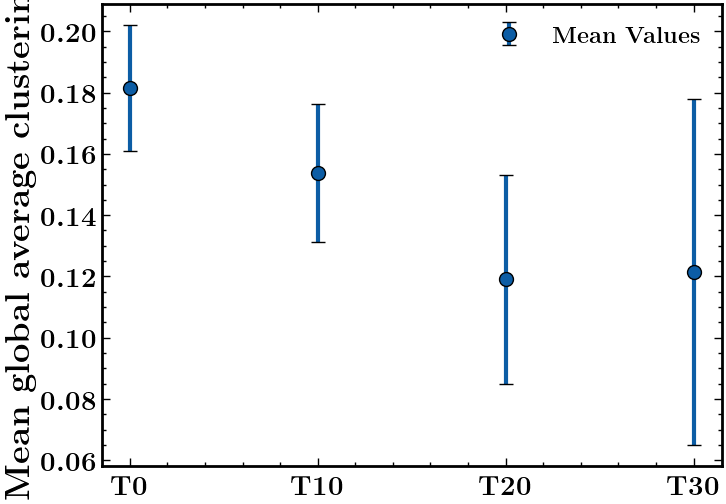

In [29]:
T0_median = np.mean(all_global_average_clustering[0])
T10_median = np.mean(all_global_average_clustering[1])
T20_median = np.mean(all_global_average_clustering[2])
T30_median = np.mean(all_global_average_clustering[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_global_average_clustering[0])
T10_std = np.std(all_global_average_clustering[1])
T20_std = np.std(all_global_average_clustering[2])
T30_std = np.std(all_global_average_clustering[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)
plt.xticks(np.arange(len(T_median)),[r'\bf{T0}', r'\bf{T10}', r'\bf{T20}', r'\bf{T30}'])
plt.ylabel(r'\bf{Mean global average clustering}')


# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend([r'\bf{Mean Values'])


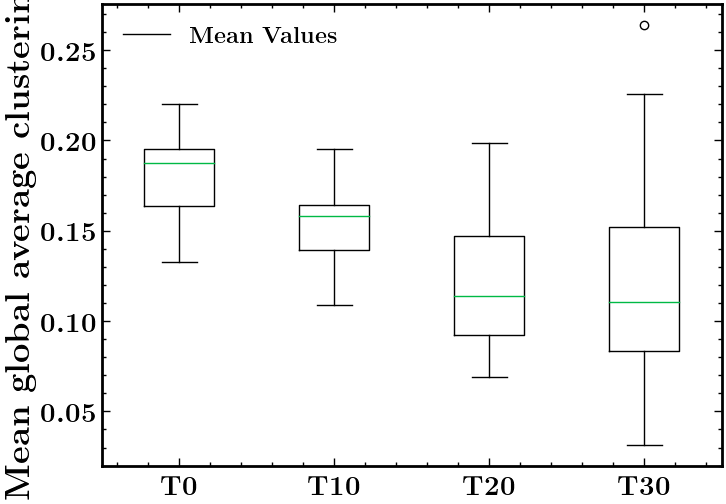

In [30]:
T0_median = np.mean(all_global_average_clustering[0])
T10_median = np.mean(all_global_average_clustering[1])
T20_median = np.mean(all_global_average_clustering[2])
T30_median = np.mean(all_global_average_clustering[3])

# Plotting with error bars
labels = [r'\bf{T0}', r'\bf{T10}', r'\bf{T20}', r'\bf{T30}']
plt.boxplot(all_global_average_clustering, labels = labels )
plt.ylabel(r'\bf{Mean global average clustering}')


# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend([r'\bf{Mean Values'])


Text(0.5, 0, 'Image')

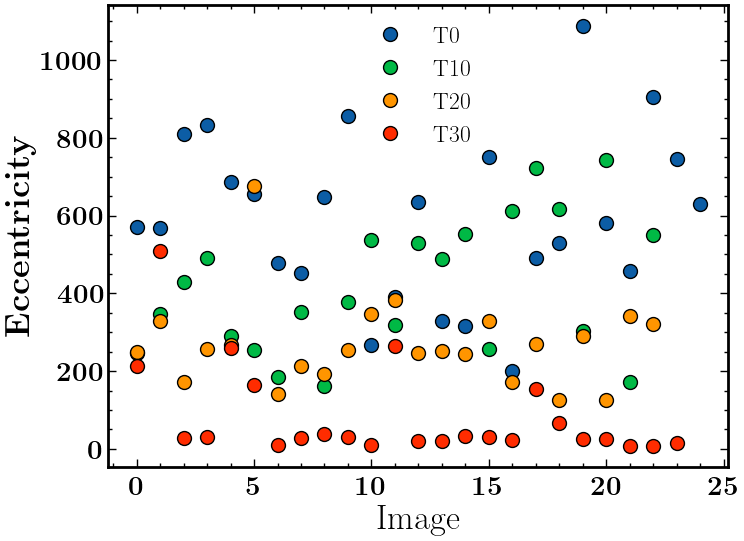

In [31]:
graphic_nodes(all_eccentricity[0],label='T0')
graphic_nodes(all_eccentricity[1],label='T10')
graphic_nodes(all_eccentricity[2],label='T20')
graphic_nodes(all_eccentricity[3],label='T30')

plt.ylabel(r'\bf{Eccentricity}')
plt.xlabel('Image')
#plt.ylim([-2,np.max(global_average_clustering)+1])

([<matplotlib.axis.XTick at 0x18cbf6510d0>,
 [Text(0, 0, '\\bf{T0}'),
  Text(1, 0, '\\bf{T10}'),
  Text(2, 0, '\\bf{T20}'),
  Text(3, 0, '\\bf{T30}')])

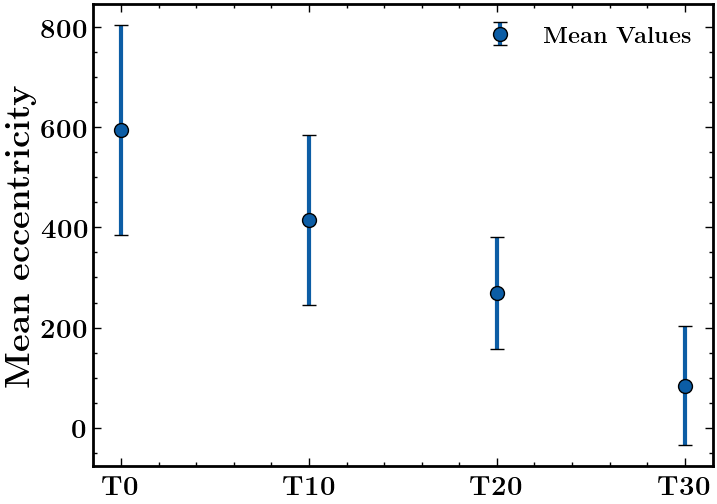

In [32]:
T0_median = np.mean(all_eccentricity[0])
T10_median = np.mean(all_eccentricity[1])
T20_median = np.mean(all_eccentricity[2])
T30_median = np.mean(all_eccentricity[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_eccentricity[0])
T10_std = np.std(all_eccentricity[1])
T20_std = np.std(all_eccentricity[2])
T30_std = np.std(all_eccentricity[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)

plt.ylabel(r'\bf{Mean eccentricity}')


# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend([r'\bf{Mean Values}'])
plt.xticks(np.arange(len(T_median)), [r'\bf{T0}', r'\bf{T10}', r'\bf{T20}', r'\bf{T30}'])


Text(0, 0.5, '\\bf{Mean eccentricity}')

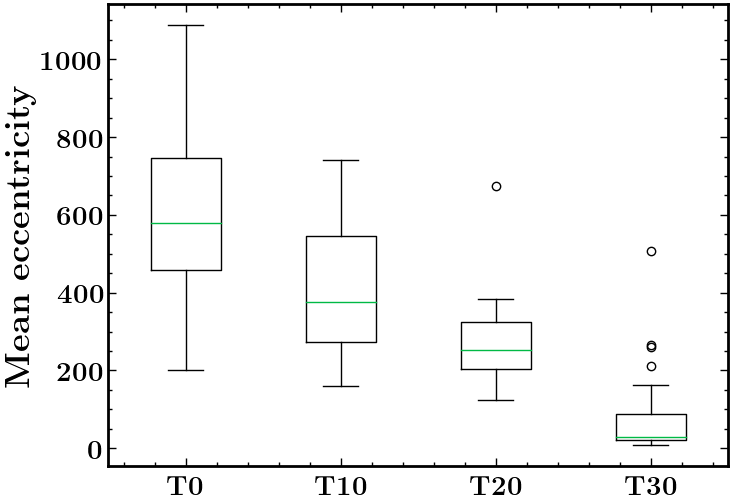

In [33]:
T0_median = np.mean(all_eccentricity[0])
T10_median = np.mean(all_eccentricity[1])
T20_median = np.mean(all_eccentricity[2])
T30_median = np.mean(all_eccentricity[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])

labels = [r'\bf{T0}', r'\bf{T10}', r'\bf{T20}', r'\bf{T30}']
plt.boxplot(all_eccentricity, labels = labels )
plt.ylabel(r'\bf{Mean eccentricity}')
